In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [5]:
imbalance = tickbars.tick_rule(data_indexed['price'])
p_b_up = (imbalance.mean().item()+1)/2
print(p_b_up)

0.5038884176348081


In [6]:
volume = data_indexed['volume']*data_indexed['price']
volume_imbalance = imbalance*volume
volume_up = np.mean([v for v in volume_imbalance if v > 0])
volume_down = -np.mean([v for v in volume_imbalance if v < 0])
print(volume_up, volume_down)

6679.686732733376 6640.659229286639


In [7]:
ties = tickbars.DollarVolumeRunsEvents(imbalance, volume, 100000, imbalance.mean().item(), volume_up, volume_down, 2*1e-5)

In [8]:
tick_imb_tevents = ties.get_events()

In [9]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
128354,3.365817e+08,2013-09-03 07:19:51.682
211138,2.783153e+08,2013-09-03 09:05:12.739
304075,3.018926e+08,2013-09-03 10:24:08.918
402084,3.438951e+08,2013-09-03 11:54:46.750
509589,3.363369e+08,2013-09-03 14:00:26.109
589783,3.240111e+08,2013-09-03 15:06:49.766
718002,3.675223e+08,2013-09-04 09:01:00.927
800891,3.169638e+08,2013-09-04 10:31:55.071
890523,3.472236e+08,2013-09-04 13:08:36.553


In [10]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

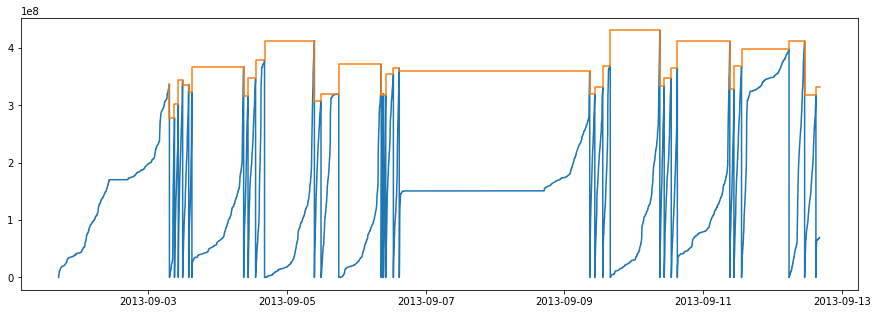

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
plt.show()

In [12]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [13]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-03 07:19:51.106,1640.25,1649.00,1639.00,1644.50,402684,1645.219611,137991.023,128354
1,2013-09-03 09:05:12.729,1644.50,1650.00,1644.00,1647.00,325060,1647.484370,6321.047,82784
2,2013-09-03 10:24:08.918,1647.00,1648.75,1640.25,1640.25,349851,1645.381910,4736.179,92937
3,2013-09-03 11:54:46.750,1640.25,1641.50,1633.75,1635.00,404964,1637.878448,5437.832,98009
4,2013-09-03 14:00:26.109,1635.00,1635.50,1630.75,1635.00,399199,1633.498378,7539.359,107505
5,2013-09-03 15:06:49.766,1635.00,1639.50,1634.25,1638.25,370249,1637.264049,3983.657,80194
6,2013-09-04 09:01:00.927,1638.25,1644.25,1635.00,1644.00,441778,1638.942420,64451.161,128219
7,2013-09-04 10:31:55.030,1644.00,1649.75,1643.75,1649.75,365407,1646.998361,5454.103,82889
8,2013-09-04 13:08:36.553,1649.75,1654.75,1648.75,1651.50,413074,1652.355904,9401.482,89632
9,2013-09-04 16:14:13.056,1651.50,1655.25,1649.50,1655.00,426168,1651.815193,11136.503,97059


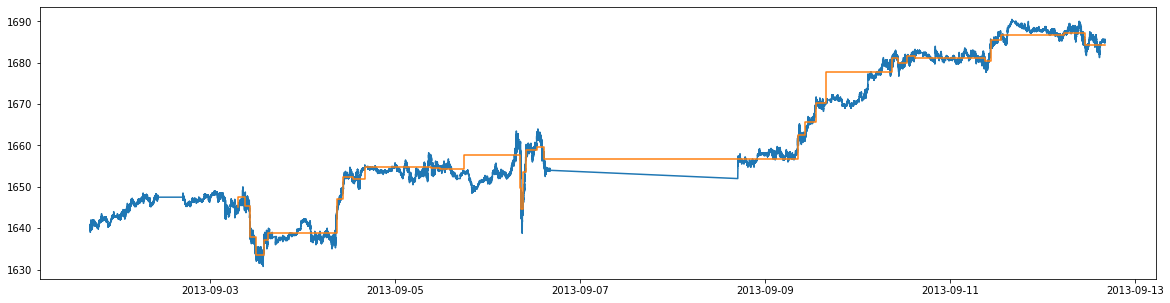

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()